# Network Measures

Network structure can be quantified using different network measures. These parameters can be classified into two: centrality measures or node-level measures and network-level measures.  

## Centrality Measures (node-level measures)

In network analysis, centrality measures identify the most "important" nodes inside a graph; in other words, how "central" a node is within the whole network. However, depending on how "importance" is defined, different nodes may be considered important. Because of its vast application and relatively easy computation, centrality is frequently the first measurement done in network analysis. Calculating it can help identify the influencers in a social media network or the disease super-spreaders during a pandemic. We discuss here some of the centrality measures used in network analysis.

In weighted networks, we can also calculate the **node strength**, which is the sum of the weights of edges connected to the node. 

**Degree centrality** is the number of edges connected to a given node. In a social network, this might mean the number of friends an individual has. It can be computed using the equation $\frac{m}{n-1}$ , where m is the number of edges connected to a node and n is the total number of nodes. 

### Example 1

Let us consider the network of some of the characters from Noli Me Tangere shown in {numref}`noli`. 

```{figure} ./images/noli2.png
:name: noli
:width: 500px

Network of characters from Noli Me Tangere
```

We can convert this to a networkx graph as shown here.

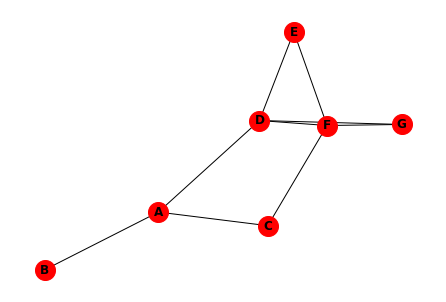

In [1]:
import networkx as nx
from alis.network_tools.plots import plot_degree_distribution
from alis.network_tools.metrics import (
    degree_centrality, betweenness_centrality, closeness_centrality,
    eigenvector_centrality, average_degree
)

G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
G.add_edges_from([("A","B"),("A","C"),("A","D"),("C","F"),
("D","E"),("D","F"),("D","G"),("E","F"),("F","G")])
nx.draw(G, node_size=400, node_color='red', with_labels=True, font_weight='bold')

And then calculate the degree centrality of each node.

In [2]:
degree_centrality(G)

Degree centrality:
D:0.667 F:0.667 A:0.5 C:0.333 E:0.333 G:0.333 B:0.167 



**Betweenness centrality** is the number of geodesic paths (shortest paths) that go through a given node. Nodes with high betweenness may be influential in a network because information tends to flow through them.

In [3]:
betweenness_centrality(G)

Betweenness centrality:
A:0.367 D:0.367 F:0.2 C:0.0667 B:0.0 E:0.0 G:0.0 



**Closeness centrality** is the number of steps required to access every other node from a given node. It is given by the equation inverse($\frac{number of steps}{n-1}$).

In [4]:
closeness_centrality(G)

Closeness centrality:
D:0.75 A:0.667 F:0.667 C:0.6 E:0.545 G:0.545 B:0.429 



**Eigenvector centrality** is determined from the values of the first eigenvector of the graph adjacency matrix. The values are high for vertices that are connected to many other vertices that are, in turn, connected many others and so on.

In [5]:
eigenvector_centrality(G)

Eigenvector centrality:
D:0.529 F:0.522 E:0.358 G:0.358 A:0.314 C:0.285 B:0.107 



{numref}`centrality` illustrates the various centrality measures in a sample graph.

```{figure} ./images/centrality1.png
:name: centrality
:width: 500px

Illustration of various centrality measures
```



### Network-level Measures

The network measures tell us about the structure of the graph. Presented here are some of the network that are often calculated.

1. Network size - number of nodes.
2. Density - number of edges that exist / number of possible edges. If n is the number of nodes and m is the number of edges then density = $\frac{2m}{n(n-1)}$ for an undirected graph and density = $\frac{m}{n(n-1)}$ for a directed graph.
3. Degree distribution - statistical distribution of node degrees in a network.
4. Average path length - the fewest number of edges that you would have to go on to get from one node to another. 
5. Diameter - maximum path length.
6. Clustering coefficient (Transitivity) - probability of two nodes that are connected to a common node being connected themselves. 

In [6]:
print("number of nodes = ", G.number_of_nodes())
print("density = ", nx.density(G))
print("average path length = ", nx.average_shortest_path_length(G))
print("diameter = ", nx.diameter(G))
print("average_degree = ", average_degree(G))

local_clustering_coefficient = nx.algorithms.cluster.clustering(G)
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)
print("average clustering coefficient = ", av_local_clustering_coefficient)

number of nodes =  7
density =  0.42857142857142855
average path length =  1.7142857142857142
diameter =  3
average_degree =  2.5714285714285716
average clustering coefficient =  0.38095238095238093


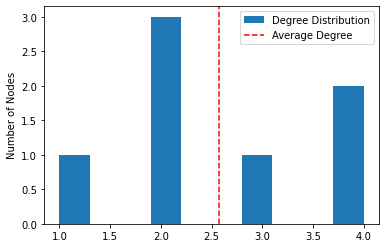

In [7]:
plot_degree_distribution(G)

## Exercise

Calculate the centrality and network measures of the graph in {numref}`centrality` . Determine the nodes with the highest centrality measures. 